In [2]:
import os
import shutil
import random


dataset_dir = '/content/drive/MyDrive/dataset/'

train_dir = '/content/drive/MyDrive/split_dataset_new/train/'
test_dir = '/content/drive/MyDrive/split_dataset_new/test/'


if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:

class_names = os.listdir(dataset_dir)

for class_name in class_names:

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

In [5]:
for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)


    random.shuffle(images)


    split_index = int(0.8 * len(images))


    for i, image_name in enumerate(images):
        src = os.path.join(class_path, image_name)
        if i < split_index:

            dst = os.path.join(train_dir, class_name, image_name)
        else:

            dst = os.path.join(test_dir, class_name, image_name)


        shutil.copy(src, dst)

print("Dataset split complete!")


Dataset split complete!


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2464 images belonging to 6 classes.
Found 618 images belonging to 6 classes.


In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 37s 358ms/step - accuracy: 0.2581 - loss: 1.9919 - val_accuracy: 0.4391 - val_loss: 1.4187
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 1.3888
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 348ms/step - accuracy: 0.4900 - loss: 1.3342 - val_accuracy: 0.4803 - val_loss: 1.3137
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.8910
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 351ms/step - accuracy: 0.6082 - loss: 1.1004 - val_accuracy: 0.6382 - val_loss: 0.9777
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 1.0601
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 353ms/step - accuracy: 0.7124 - loss: 0.8386 - val_accuracy: 0.7155 - val_loss: 0.8266
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.7520
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 341ms/step - accuracy: 0.7562 - loss: 0.7

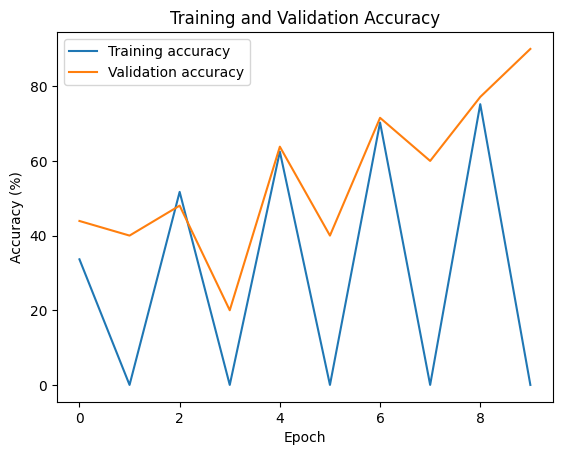

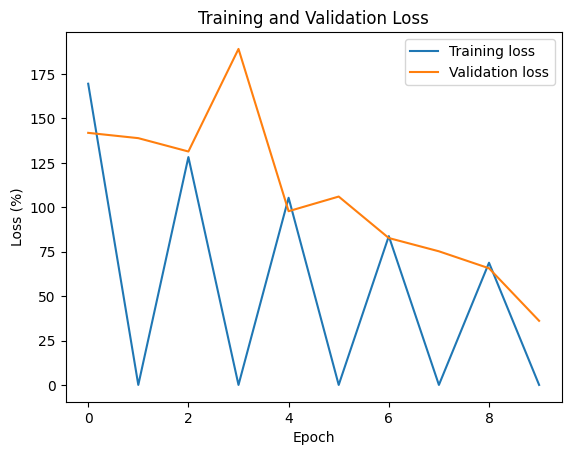

In [11]:
import matplotlib.pyplot as plt


plt.plot([x * 100 for x in history.history['accuracy']], label='Training accuracy')
plt.plot([x * 100 for x in history.history['val_accuracy']], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.plot([x * 100 for x in history.history['loss']], label='Training loss')
plt.plot([x * 100 for x in history.history['val_loss']], label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)


print(f'Test Loss: {test_loss * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 0.7731 - loss: 0.6740
Test Loss: 65.18%
Test Accuracy: 77.35%


In [13]:
model.save('/content/drive/MyDrive/image_classification_model_new.h5')